# Proyecto 2-Parte I (Core)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils


In [2]:
data = pd.read_csv('../datasets/1-cancer.csv')

In [3]:
data.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         569 non-null    int64  
 1   Diagnosis                  569 non-null    object 
 2   Radius (mean)              569 non-null    float64
 3   Texture (mean)             569 non-null    float64
 4   Perimeter (mean)           569 non-null    float64
 5   Area (mean)                569 non-null    float64
 6   Smoothness (mean)          569 non-null    float64
 7   Compactness (mean)         569 non-null    float64
 8   Concavity (mean)           569 non-null    float64
 9   Concave points (mean)      569 non-null    float64
 10  Symmetry (mean)            569 non-null    float64
 11  Fractal dimension (mean)   569 non-null    float64
 12  Radius (se)                569 non-null    float64
 13  Texture (se)               569 non-null    float64

Eliminamos la Columna User ID porque no aporta nada

In [5]:
data.drop(columns=['Id'], inplace=True)

Verificamos si existen duplicados

In [6]:
duplicados = data.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


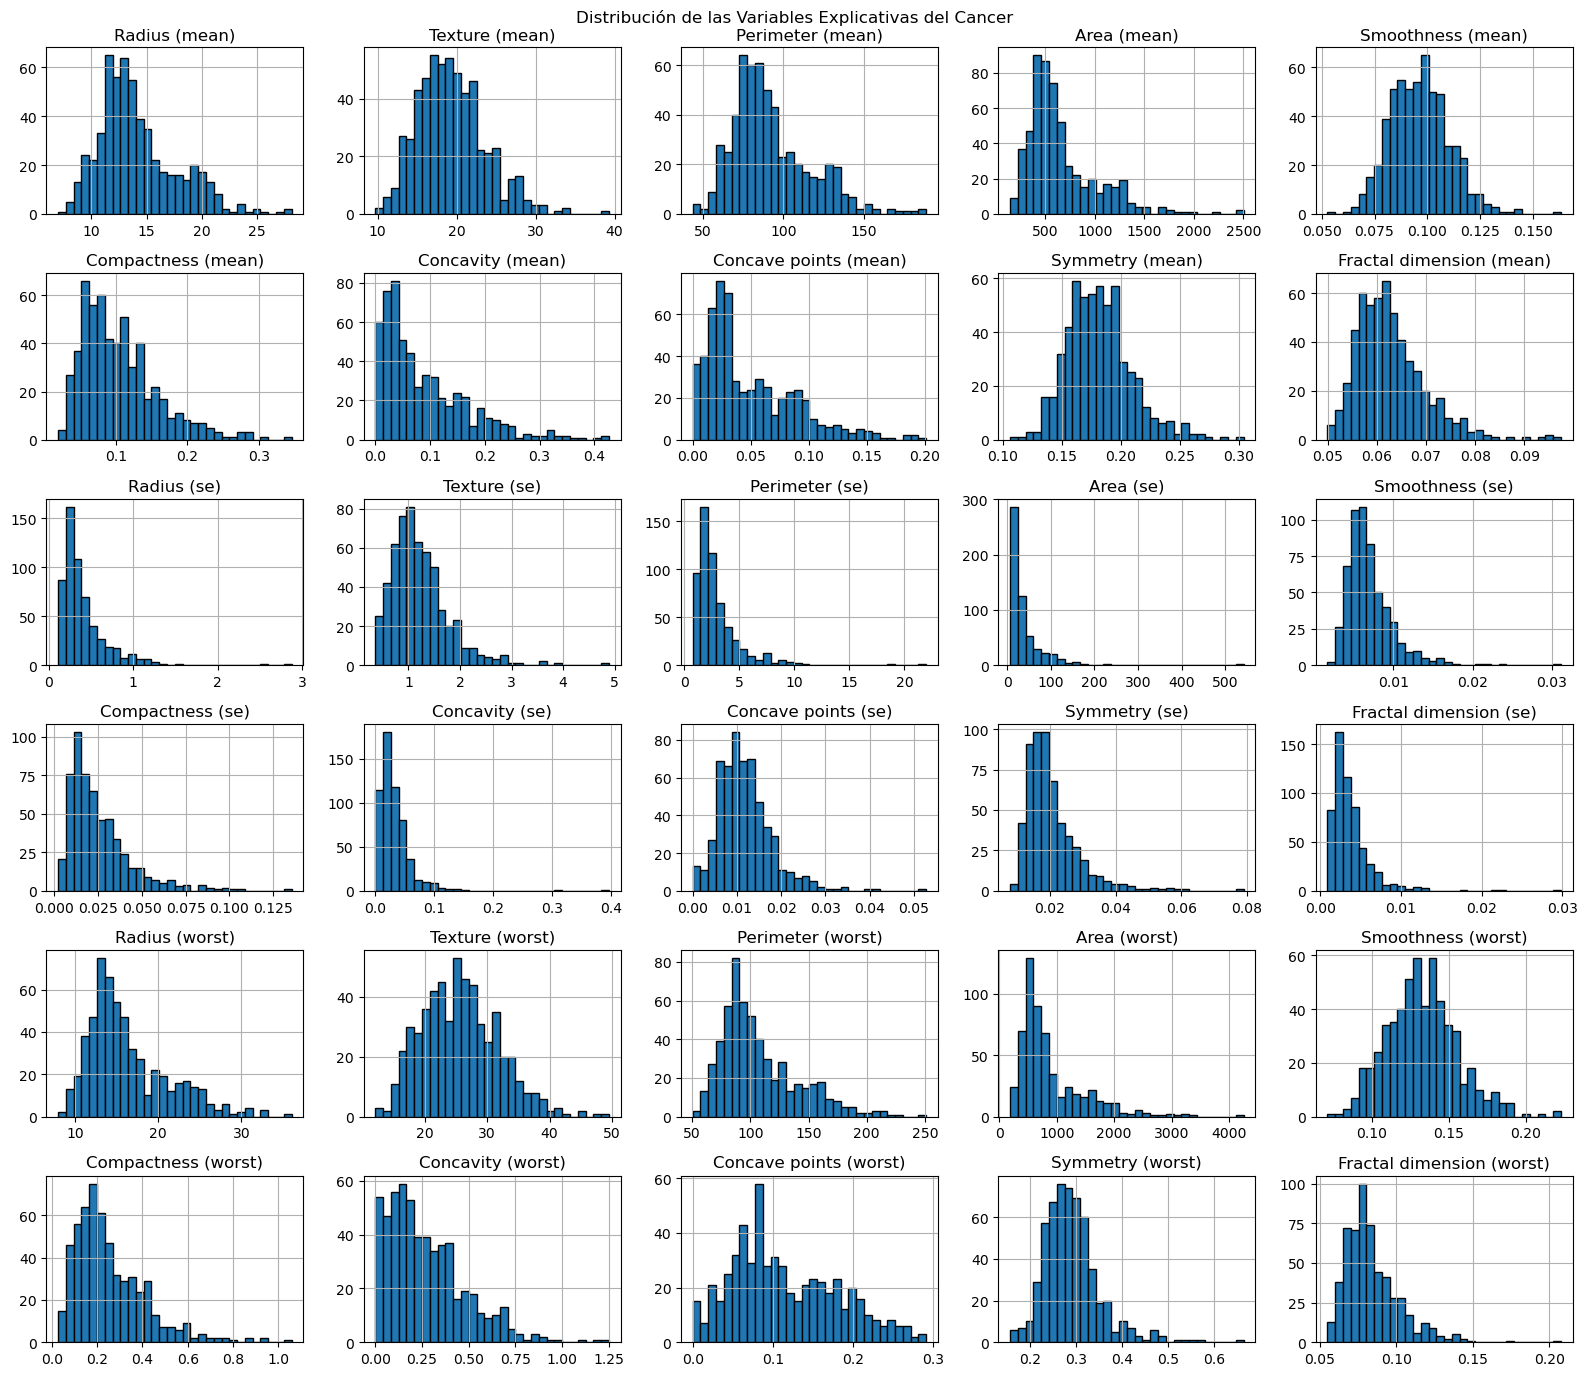

In [7]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(16, 14), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Cancer')
plt.tight_layout()
plt.show()

Separamos las variables categoricas y numericas para mejor control

In [8]:
# Seleccionar las columnas categoricas
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool'])
# Seleccionar las columnas numéricas
numerical_columns = data.select_dtypes(include=[np.number])

Consistencia en valores categoricos

In [9]:
data_dict_category = {
    'Diagnosis': 'category',
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_category.items():
    categorical_columns[column] = categorical_columns[column].astype(dtype, errors='ignore')
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Diagnosis  569 non-null    category
dtypes: category(1)
memory usage: 825.0 bytes


Limpiamos las columnas categoricas, nos aseguramos de quitar mayusculas y cualquier caracter invalido

In [10]:
# Aplicar la limpieza a las columnas categóricas
for col in categorical_columns:
    categorical_columns[col] = categorical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in categorical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(categorical_columns[col].unique())


Valores únicos después de limpieza en 'Diagnosis':
['b', 'm']
Categories (2, object): ['b', 'm']


Verificamos que esten todos correctos

In [11]:
# Ejecutar la validación
mismatches = utils.validar_tipos(categorical_columns, data_dict_category)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


Vemos si existen NaN en las columnas categoricas

In [12]:
utils.calculate_na_statistics(categorical_columns)

,datos sin NAs en q,Na en q,Na en %
Diagnosis,569,0,0.0


Consistencia en valores numericos

In [13]:
numerical_columns

,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [14]:
# Crear el diccionario con los tipos de datos
data_dict_numeric = {
    'Radius (mean)': float,
    'Texture (mean)': float,
    'Perimeter (mean)': float,
    'Area (mean)': float,
    'Smoothness (mean)': float,
    'Compactness (mean)': float,
    'Concavity (mean)': float,
    'Concave points (mean)': float,
    'Symmetry (mean)': float,
    'Fractal dimension (mean)': float,
    'Radius (se)': float,
    'Texture (se)': float,
    'Perimeter (se)': float,
    'Area (se)': float,
    'Smoothness (se)': float,
    'Compactness (se)': float,
    'Concavity (se)': float,
    'Concave points (se)': float,
    'Symmetry (se)': float,
    'Fractal dimension (se)': float,
    'Radius (worst)': float,
    'Texture (worst)': float,
    'Perimeter (worst)': float,
    'Area (worst)': float,
    'Smoothness (worst)': float,
    'Compactness (worst)': float,
    'Concavity (worst)': float,
    'Concave points (worst)': float,
    'Symmetry (worst)': float,
    'Fractal dimension (worst)': float
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_numeric.items():
    numerical_columns[column] = numerical_columns[column].astype(dtype, errors='ignore')

# Inspeccionar la información
numerical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Radius (mean)              569 non-null    float64
 1   Texture (mean)             569 non-null    float64
 2   Perimeter (mean)           569 non-null    float64
 3   Area (mean)                569 non-null    float64
 4   Smoothness (mean)          569 non-null    float64
 5   Compactness (mean)         569 non-null    float64
 6   Concavity (mean)           569 non-null    float64
 7   Concave points (mean)      569 non-null    float64
 8   Symmetry (mean)            569 non-null    float64
 9   Fractal dimension (mean)   569 non-null    float64
 10  Radius (se)                569 non-null    float64
 11  Texture (se)               569 non-null    float64
 12  Perimeter (se)             569 non-null    float64
 13  Area (se)                  569 non-null    float64

Limpiamos las columnas numericas

In [15]:
for col in numerical_columns:
    numerical_columns[col] = numerical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in numerical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(numerical_columns[col].unique())


Valores únicos después de limpieza en 'Radius (mean)':
[13.54  13.08   9.504 13.03   8.196 12.05  13.49  11.76  13.64  11.94
 11.52  13.05   8.618 10.17   8.598  9.173  9.465 11.31   9.029 12.78
  8.888 12.31  13.53  12.86  11.45  13.34  12.    12.36  14.64  14.62
 13.27  13.45  12.18   9.787 11.6    6.981  9.876 10.49  11.64  11.34
  9.777 12.63  14.26  10.51   8.726 11.93   8.95  11.41  14.5   13.37
 13.85  15.1   12.19  15.71  11.71  11.43  11.28   9.738 12.9   10.75
 11.9   14.95  14.44  13.74  13.     8.219  9.731 11.15  13.15  12.25
 16.84  12.06  10.9   11.75  12.34  14.97  10.8   12.32  11.08  10.66
  8.671  9.904 13.01  12.81  10.08  11.81  12.3   12.77   9.72  12.91
 12.23  12.47  13.11  15.27  11.84  11.89  10.2   13.65  13.56  10.18
 14.34  10.44  15.    12.62  11.32  11.22   9.567 14.03  14.22  12.42
 11.3   13.75  10.48  13.2   12.89  10.65  11.5   10.6   13.59  12.87
 10.71  14.29  11.29   9.742 11.33  11.74  12.58  11.26  11.37  14.41
 14.96  12.95  11.85  12.72  13.77

Verificamos si existen NaN en las columnas numericas

In [16]:
utils.calculate_na_statistics(numerical_columns)

,datos sin NAs en q,Na en q,Na en %
Radius (mean),569,0,0.0
Texture (mean),569,0,0.0
Symmetry (worst),569,0,0.0
Concave points (worst),569,0,0.0
Concavity (worst),569,0,0.0
Compactness (worst),569,0,0.0
Smoothness (worst),569,0,0.0
Area (worst),569,0,0.0
Perimeter (worst),569,0,0.0
Texture (worst),569,0,0.0


Graficamos boxplots para identificar los posibles Outliers

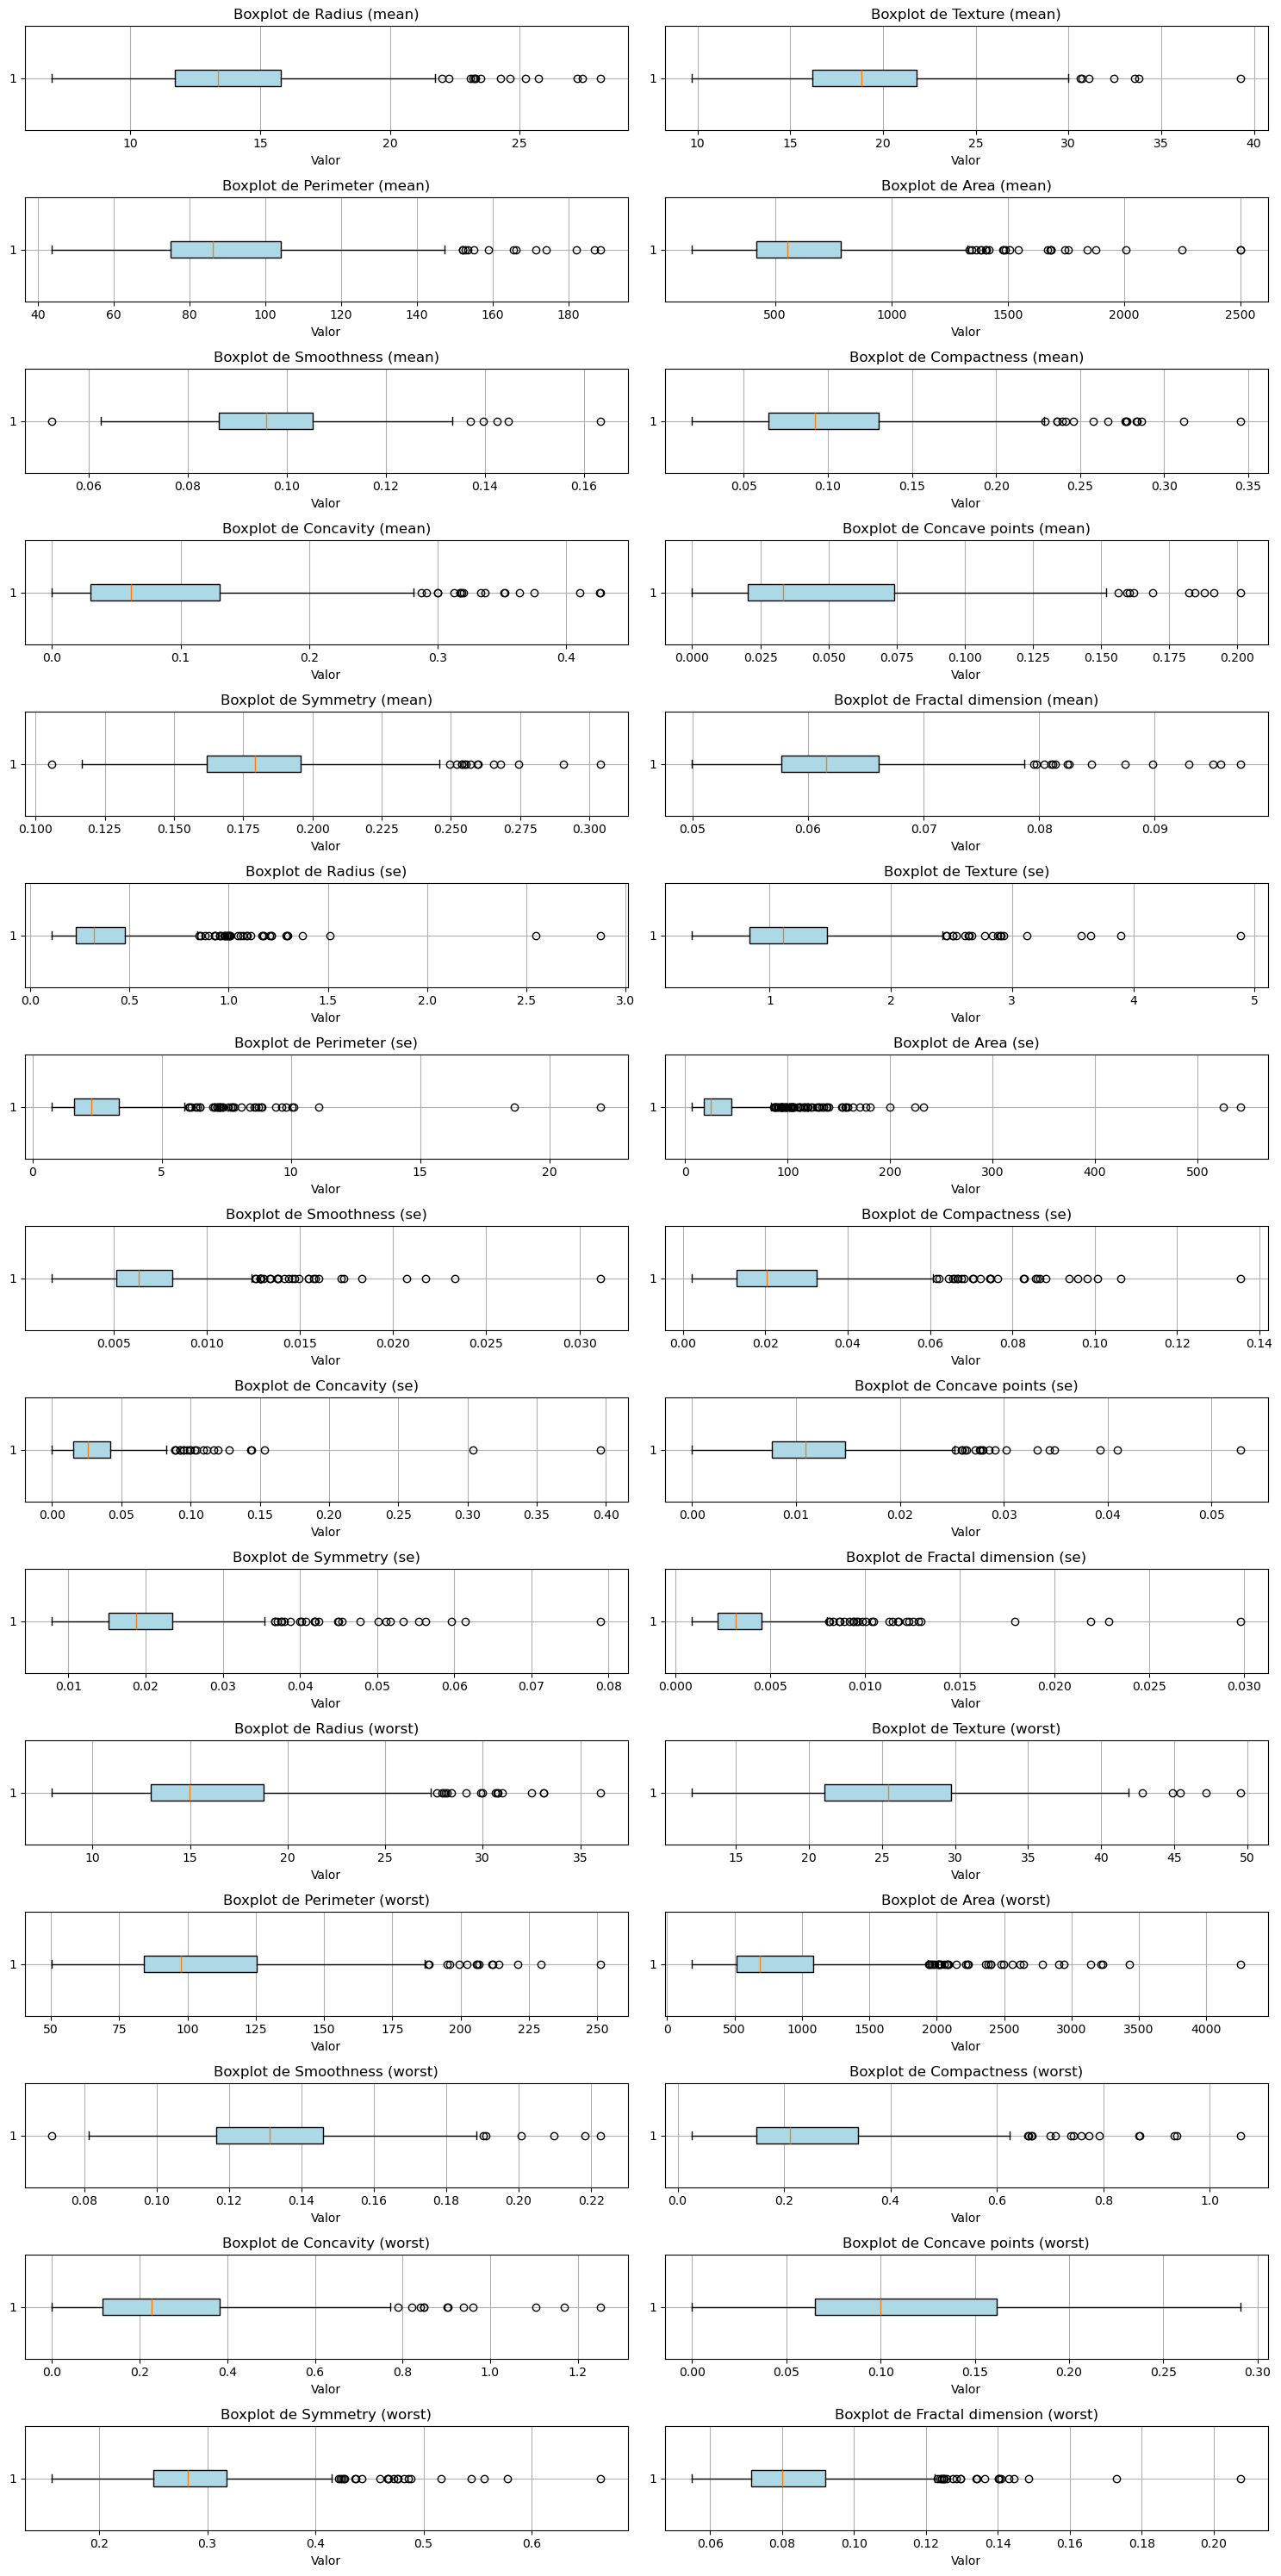

In [17]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(15, 30))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(numerical_columns.columns):
    axes[i].boxplot(numerical_columns[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}'),
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Calculamos los porcentajes de Outliers

In [18]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number])
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Radius (mean),14.0,2.460457,6.981000,21.750000
Texture (mean),7.0,1.230228,9.710000,29.970000
Perimeter (mean),13.0,2.284710,43.790000,147.300000
Area (mean),25.0,4.393673,143.500000,1326.000000
Smoothness (mean),6.0,1.054482,0.062510,0.133500
Compactness (mean),16.0,2.811951,0.019380,0.228400
Concavity (mean),18.0,3.163445,0.000000,0.281000
Concave points (mean),10.0,1.757469,0.000000,0.152000
Symmetry (mean),15.0,2.636204,0.116700,0.245900
Fractal dimension (mean),15.0,2.636204,0.049960,0.078710


Analizamos las columnas con outliers


📊 Análisis de Distribución para Area (se)
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 40.3371
- Mediana: 24.5300
- Desv_est: 45.4910
- Asimetria: 5.4472
- Kurtosis: 49.2091
- Min: 6.8020
- Max: 542.2000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.0000
- Weibull: p-valor = 0.0000

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Weibull
⚠️ Advertencia: Ninguna distribución se ajusta perfectamente


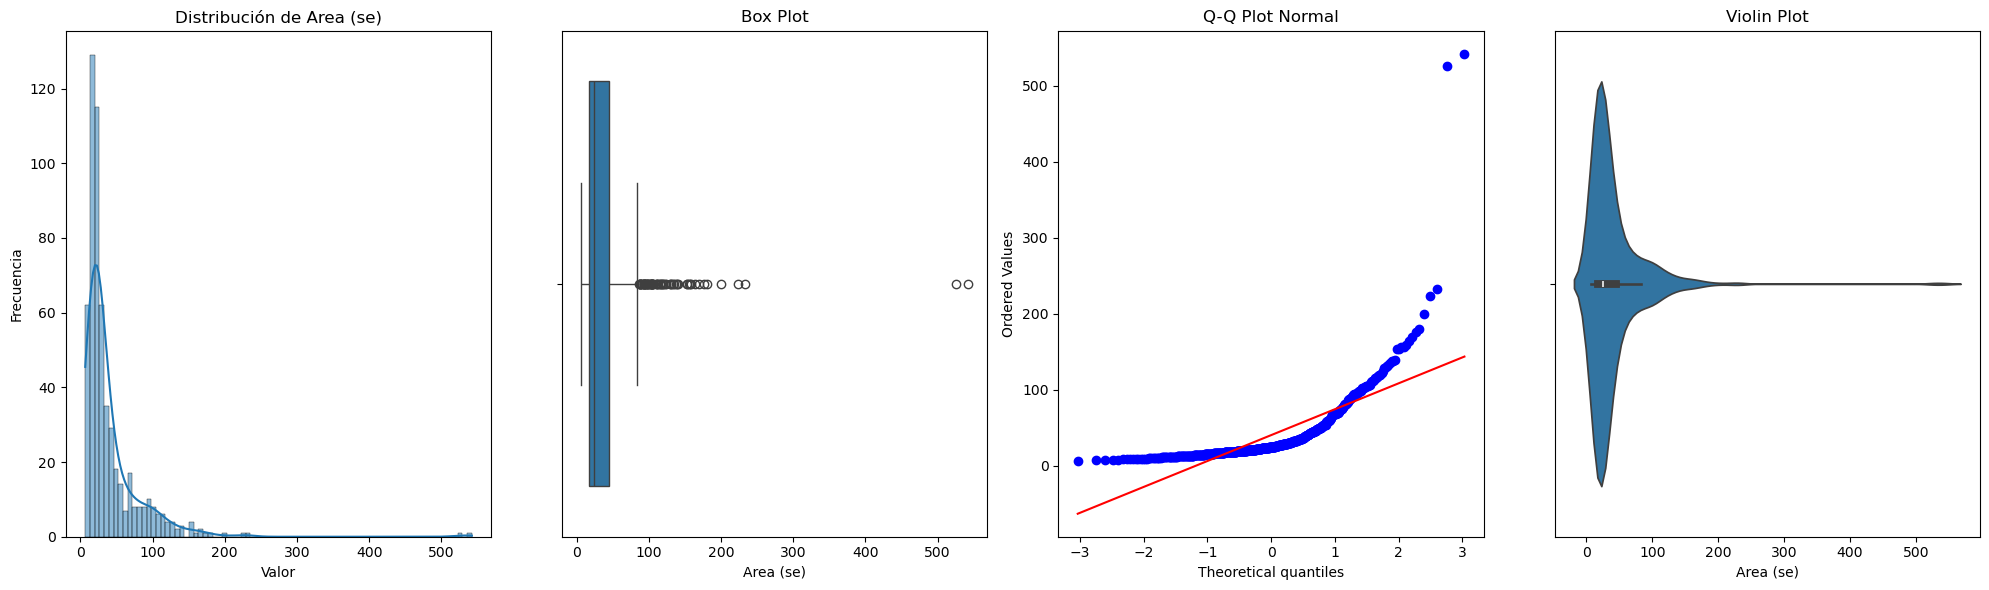

In [19]:
resultados = utils.analizar_distribucion_avanzada(data['Area (se)'], 'Area (se)')


📊 Análisis de Distribución para Radius (se)
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 0.4052
- Mediana: 0.3242
- Desv_est: 0.2773
- Asimetria: 3.0886
- Kurtosis: 17.6867
- Min: 0.1115
- Max: 2.8730

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.0361
- Weibull: p-valor = 0.0000

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Gamma
⚠️ Advertencia: Ninguna distribución se ajusta perfectamente


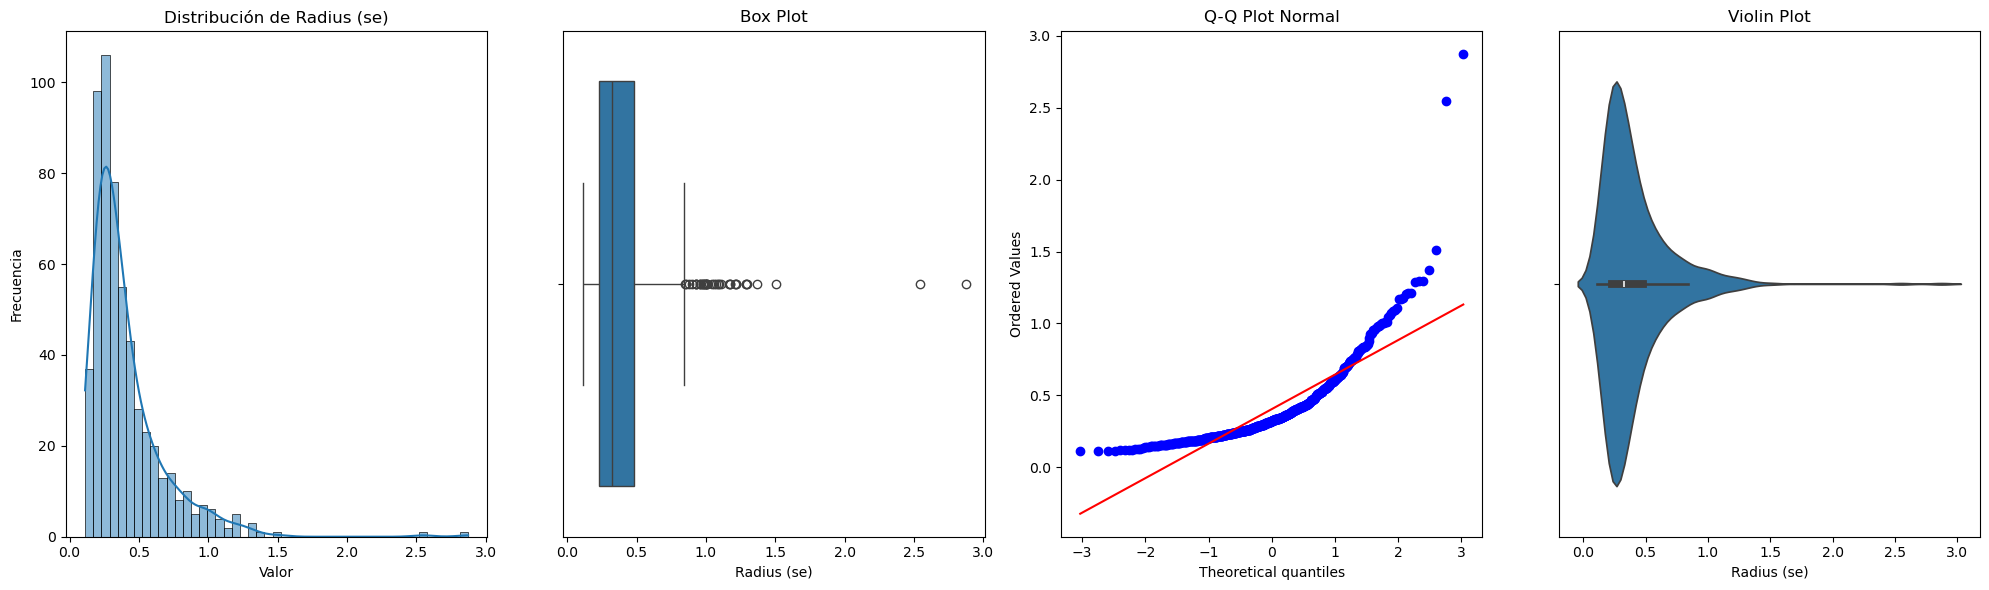

In [20]:
resultados = utils.analizar_distribucion_avanzada(data['Radius (se)'], 'Radius (se)')


📊 Análisis de Distribución para Perimeter (se)
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 2.8661
- Mediana: 2.2870
- Desv_est: 2.0219
- Asimetria: 3.4436
- Kurtosis: 21.4019
- Min: 0.7570
- Max: 21.9800

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.0000
- Weibull: p-valor = 0.0079

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Weibull
⚠️ Advertencia: Ninguna distribución se ajusta perfectamente


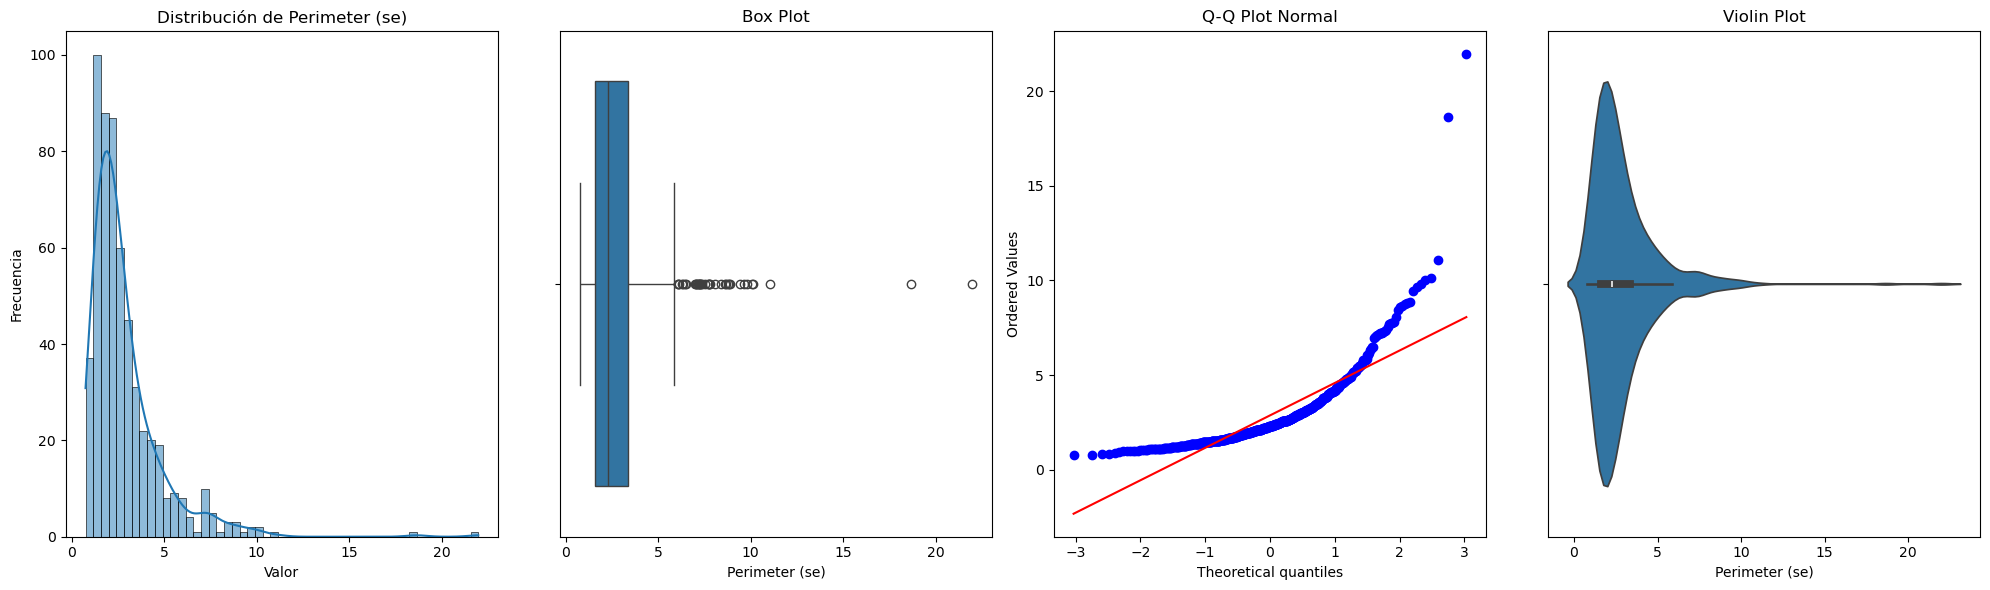

In [21]:
resultados = utils.analizar_distribucion_avanzada(data['Perimeter (se)'], 'Perimeter (se)')

Despues de analizar los outliers decido no imputar nada porque no existen Outliers

Estadisticas Descriptivas de las Columnas Numericas

In [22]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_columns:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Radius (mean),569.0,14.13,13.37,3.52,6.98,28.11,11.70,15.78
Texture (mean),569.0,19.29,18.84,4.30,9.71,39.28,16.17,21.80
Perimeter (mean),569.0,91.97,86.24,24.30,43.79,188.50,75.17,104.10
Area (mean),569.0,654.89,551.10,351.91,143.50,2501.00,420.30,782.70
Smoothness (mean),569.0,0.10,0.10,0.01,0.05,0.16,0.09,0.11
Compactness (mean),569.0,0.10,0.09,0.05,0.02,0.35,0.06,0.13
Concavity (mean),569.0,0.09,0.06,0.08,0.00,0.43,0.03,0.13
Concave points (mean),569.0,0.05,0.03,0.04,0.00,0.20,0.02,0.07
Symmetry (mean),569.0,0.18,0.18,0.03,0.11,0.30,0.16,0.20
Fractal dimension (mean),569.0,0.06,0.06,0.01,0.05,0.10,0.06,0.07


In [ ]:
pearson_corr = numerical_columns.corr(method='pearson')
spearman_corr = numerical_columns.corr(method='spearman')
kendall_corr = numerical_columns.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(30, 20),
    annot_size=7
)

In [ ]:
data_clean = pd.concat([numerical_columns, categorical_columns], axis=1)
data_clean



,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),...,Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst),Diagnosis
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,b
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,b
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,b
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,b
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,m
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,m
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,m
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,m
